TN Farm News Title and Publishing Date Metadata Automation

In [1]:
%matplotlib inline
from pathlib import Path
from shutil import copy

import cv2
import numpy as np
import pandas as pd
import pytesseract
from fuzzywuzzy import fuzz, process
from ipywidgets import IntProgress, Label, VBox
from IPython.display import display
from matplotlib import pyplot as plt
from PIL import Image
from skimage.measure import compare_ssim as ssim

import img_qc.img_qc as img_qc

plt.rc('figure', figsize=(20.0, 10.0))

In [32]:
def bgr_imshow(bgr_image):
    bgr_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    plt.imshow(bgr_image)
    plt.show()

    
def crop_image_for_ocr(image_path, percentage=0.4, top_and_sides_padding=25):
    
    # load image and get shape
    image = cv2.imread(str(image_path))
    height, width = image.shape[:2]
    
    # set (x, y) pairs
    x1, y1, x2, y2 = 0, 0, width, int(height * percentage)
    
    # add/subtract padding from the top/left/right 
    x1 += top_and_sides_padding
    y1 += top_and_sides_padding
    x2 -= top_and_sides_padding
    # add image area to the bottom that was cropped from the top
    y2 += top_and_sides_padding
    
    # crop image
    image = image[y1:y2, x1:x2]
    
    return image


def if_rgb_convert_to_gray(np_image):
    if len(np_image.shape) > 2:
        np_image = cv2.cvtColor(np_image, cv2.COLOR_RGB2GRAY)
        
    return np_image

In [45]:
# feature descriptor
class RootSIFT:
    def __init__(self):
        # initialize the SIFT feature extractor
        self.extractor = cv2.xfeatures2d.SIFT_create()
        
    def compute_descriptors(self, image, keypoints, epsilon=1e-7):
        # compute SIFT descriptors
        (keypoints, descriptors) = self.extractor.detectAndCompute(image, None)
        
        # if there are are no keypoints or descriptors
        if len(keypoints) == 0:
            # return an empty tuple
            return ([], None)
        
        # apply the Hellinger kernel by first L1-normalizing and taking the
        # square root
        descriptors /= (descriptors.sum(axis=1, keepdims=True) + epsilon)
        descriptors = np.sqrt(descriptors)
        
        # return a tuple of the keypoints and descriptors
        return (keypoints, descriptors)

In [ ]:
# 

In [46]:
# create dataframe containing text title, image path, image crop?

In [12]:
# also try using cv2.bilateralFilter to blur image instead of Gaussian Blur

In [ ]:
# should also look at getting character in addition to word boxes so I can
# make a comparison and maybe strip out things like unnecessary commas

In [9]:
# create classes?
class title_crop():
    pass
class issue():
    pass

In [33]:
percentage = 0.4
top_and_sides_padding = 25

months = [
    'january',
    'february',
    'march',
    'april',
    'may',
    'june',
    'july',
    'august',
    'september',
    'october',
    'november',
    'december'
]

roi_box_list = ['text', 'left', 'top', 'width', 'height']

In [34]:
data_dir_path = Path('data/')
page_1_paths_list = sorted(data_dir_path.glob('images/*.tif'))
page_1_paths_list = [x for x in page_1_paths_list 
                     if not str(x.stem).startswith('.')]
print(f'{len(page_1_paths_list)} images in page 1 paths list')

3451 images in page 1 paths list


In [42]:
image_path = page_1_paths_list[1677]

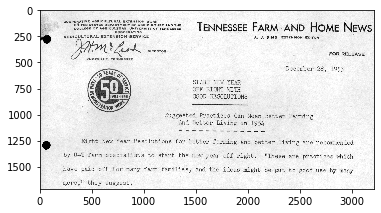

In [43]:
image = crop_image_for_ocr(image_path,
                           percentage=percentage,
                           top_and_sides_padding=top_and_sides_padding)
bgr_imshow(image)